In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
def load_images_from_directory(directory):
    images = []
    labels = []

    for label in ["face", "no-face"]:
        label_path = os.path.join(directory, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.resize(image, (224, 224)) / 255.0  # Resize to 224x224 and normalize to 0-1
                images.append(image)
                labels.append(1 if label == "face" else 0)

    return np.array(images), np.array(labels)

# Load training, validation, and test data
train_images, train_labels = load_images_from_directory('dataset/train')
val_images, val_labels = load_images_from_directory('dataset/val')
test_images, test_labels = load_images_from_directory('dataset/test')


In [5]:
def load_images_from_directory(directory):
    images = []
    labels = []

    for label in ["face", "no-face"]:
        label_path = os.path.join(directory, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
                image = cv2.resize(image, (224, 224)) / 255.0  # Resize and normalize to [0, 1]
                images.append(image)
                labels.append(1 if label == "face" else 0)

    return np.array(images), np.array(labels)

# Load training, validation, and test data
train_images, train_labels = load_images_from_directory('dataset/train')
val_images, val_labels = load_images_from_directory('dataset/val')
test_images, test_labels = load_images_from_directory('dataset/test')


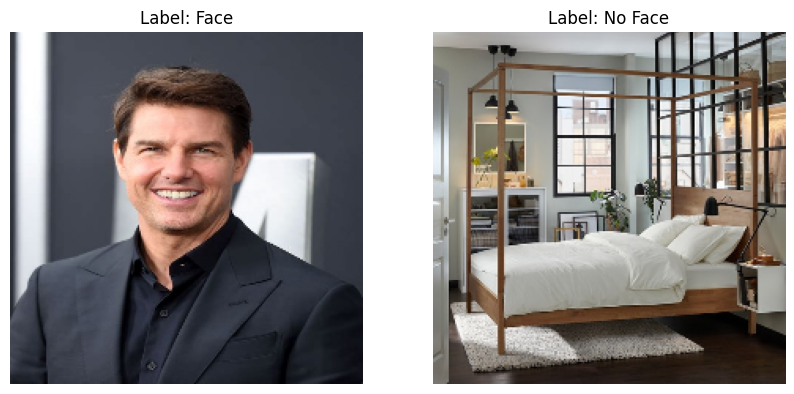

In [6]:
plt.figure(figsize=(10, 5))

# Display one sample image from the 'face' class
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title(f"Label: {'Face' if train_labels[0] == 1 else 'No Face'}")
plt.axis('off')

# Display one sample image from the 'non-face' class
plt.subplot(1, 2, 2)
plt.imshow(train_images[-1])
plt.title(f"Label: {'Face' if train_labels[-1] == 1 else 'No Face'}")
plt.axis('off')

plt.show()


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


C:\Users\Hp820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7036 - loss: 1.7626

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(32,), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [10]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")

Training images shape: (1362, 224, 224, 3)
Training labels shape: (1362,)


In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9609 - loss: 0.1094

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(32,), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [12]:
train_labels = train_labels.reshape(-1)
val_labels = val_labels.reshape(-1)
test_labels = test_labels.reshape(-1)


In [13]:
def load_images_from_directory(directory):
    images = []
    labels = []

    for label in ["face", "no-face"]:
        label_path = os.path.join(directory, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
                image = cv2.resize(image, (224, 224)) / 255.0  # Resize to 224x224 and normalize to [0, 1]
                images.append(image)
                labels.append(1 if label == "face" else 0)

    return np.array(images), np.array(labels)

# Load training, validation, and test data
train_images, train_labels = load_images_from_directory('dataset/train')
val_images, val_labels = load_images_from_directory('dataset/val')
test_images, test_labels = load_images_from_directory('dataset/test')

# Reshape labels to ensure they are 1D arrays
train_labels = train_labels.reshape(-1)
val_labels = val_labels.reshape(-1)
test_labels = test_labels.reshape(-1)

# Check dataset shapes
print(f"Training images shape: {train_images.shape}, dtype: {train_images.dtype}")
print(f"Training labels shape: {train_labels.shape}, dtype: {train_labels.dtype}")

Training images shape: (1362, 224, 224, 3), dtype: float64
Training labels shape: (1362,), dtype: int32


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6793 - loss: 1.4301

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(32,), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [17]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9538 - loss: 0.1177 - val_accuracy: 0.8168 - val_loss: 0.5970
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9863 - loss: 0.0484 - val_accuracy: 0.9634 - val_loss: 0.0929
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9839 - loss: 0.0296 - val_accuracy: 0.7766 - val_loss: 1.0666
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9927 - loss: 0.0247 - val_accuracy: 0.9304 - val_loss: 0.2172
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8095 - val_loss: 1.0538
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8462 - val_loss: 0.7088
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8645 - val_loss: 0.5790
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.7912 - val_loss:

In [20]:
# Load a saved image for testing
test_image_path = 'dataset/train/no-face/besta_tv_bench_00003.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224)) / 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(test_image)
if prediction > 0.5:
    print("Face detected")
else:
    print("No face detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
No face detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


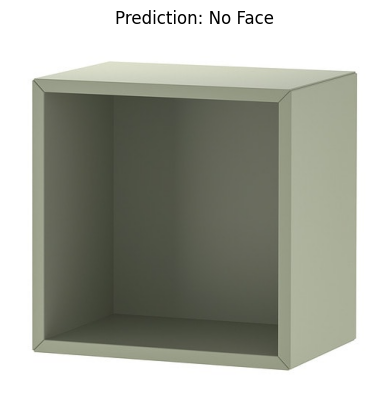

In [32]:
# Load a saved image for testing
test_image_path = 'dataset/train/no-face/eket_cabinet_00007.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224)) / 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(test_image)
label = "Face" if prediction > 0.5 else "No Face"

# Display the test image with prediction
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()